In [37]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import subplots
import chart_studio.plotly as py

import matplotlib.pyplot as plt
import scipy.stats as st

import seaborn as sns


In [38]:
# Set data files input path
path = "../Data/"

In [39]:
# Read criminal incidents file
xls_lga_ci = pd.ExcelFile(path+'LGA_Criminal_Incidents_Year_Ending_September_2021.xlsx')

lga_ci_tab1 = pd.read_excel(xls_lga_ci, "Table 01")
lga_ci_tab2 = pd.read_excel(xls_lga_ci, "Table 02")

In [40]:
# Read recorded offences file
xls_lga_ro = pd.ExcelFile(path+'LGA_Recorded_Offences_Year_Ending_September_2021.xlsx')

lga_ro_tab1 = pd.read_excel(xls_lga_ro, "Table 01")
lga_ro_tab2 = pd.read_excel(xls_lga_ro, "Table 02")


In [41]:
# Read alleged offenders file
xls_lga_ao = pd.ExcelFile(path+'LGA_Alleged_Offenders_Year_Ending_September_2021.xlsx')

lga_ao_tab1 = pd.read_excel(xls_lga_ao, "Table 01")
lga_ao_tab2 = pd.read_excel(xls_lga_ao, "Table 02")


In [42]:
# Get data for Crime Incidents, Recorded Offences and Alleged Offenders, Family Incidents
# for each police service metropolitan region 

lga_ci_by_year = lga_ci_tab1['Incidents Recorded'].loc[(lga_ci_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ci_tab1['Incidents Recorded'].loc[(lga_ci_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ci_tab1['Incidents Recorded'].loc[(lga_ci_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ci_tab1['Incidents Recorded'].loc[(lga_ci_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values 

lga_ro_by_year = lga_ro_tab1['Offence Count'].loc[(lga_ro_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ro_tab1['Offence Count'].loc[(lga_ro_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ro_tab1['Offence Count'].loc[(lga_ro_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ro_tab1['Offence Count'].loc[(lga_ro_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values

lga_ao_by_year = lga_ao_tab1['Alleged Offender Incidents'].loc[(lga_ao_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ao_tab1['Alleged Offender Incidents'].loc[(lga_ao_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ao_tab1['Alleged Offender Incidents'].loc[(lga_ao_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values + \
                 lga_ao_tab1['Alleged Offender Incidents'].loc[(lga_ao_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values


In [43]:
# Calculate rate per 100K population for Crime Incidents, Recorded Offences and Alleged Offenders, Family Incidents
# for each police service metropolitan region 

lga_ci_rate_by_year = lga_ci_tab1['Rate per 100,000 population'].loc[(lga_ci_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ci_tab1['Rate per 100,000 population'].loc[(lga_ci_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ci_tab1['Rate per 100,000 population'].loc[(lga_ci_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values +\
                      lga_ci_tab1['Rate per 100,000 population'].loc[(lga_ci_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_ci_tab1['Local Government Area'] == 'Total')].values

lga_ro_rate_by_year = lga_ro_tab1['Rate per 100,000 population'].loc[(lga_ro_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ro_tab1['Rate per 100,000 population'].loc[(lga_ro_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ro_tab1['Rate per 100,000 population'].loc[(lga_ro_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ro_tab1['Rate per 100,000 population'].loc[(lga_ro_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_ro_tab1['Local Government Area'] == 'Total')].values

lga_ao_rate_by_year = lga_ao_tab1['Rate per 100,000 population'].loc[(lga_ao_tab1['Police Region'].str[:1] == '1') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ao_tab1['Rate per 100,000 population'].loc[(lga_ao_tab1['Police Region'].str[:1] == '2') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ao_tab1['Rate per 100,000 population'].loc[(lga_ao_tab1['Police Region'].str[:1] == '3') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values + \
                      lga_ao_tab1['Rate per 100,000 population'].loc[(lga_ao_tab1['Police Region'].str[:1] == '4') 
                                                       & (lga_ao_tab1['Local Government Area'] == 'Total')].values


In [44]:
# Check years in datasets to ensure they are in the same period of 2012 - 2021
lga_ci_year = lga_ci_tab1['Year'].drop_duplicates()
lga_ro_year = lga_ro_tab1['Year'].drop_duplicates()
lga_ao_year = lga_ao_tab1['Year'].drop_duplicates()


In [45]:
# Create new dataframe
ci_re_ao_df = pd.DataFrame({'Year': lga_ci_year, 
                    'Criminal Incidents': lga_ci_by_year,
                    'CI Rate': lga_ci_rate_by_year,
                    'Recorded Offences': lga_ro_by_year, 
                    'RO Rate': lga_ro_rate_by_year,
                    'Alleged Offenders': lga_ao_by_year,
                    'AO Rate': lga_ao_rate_by_year,
                    'Total' : lga_ci_by_year + lga_ro_by_year + lga_ao_by_year,
                    'Population': lga_ci_by_year/lga_ci_rate_by_year*100000
                  })

In [46]:
# Reset dataframe index
ci_re_ao_df.reset_index(drop=True,inplace=True)
ci_re_ao_df.round(decimals=2)

,Year,Criminal Incidents,CI Rate,Recorded Offences,RO Rate,Alleged Offenders,AO Rate,Total,Population
0,2021,356549,21248.43,493293,29459.89,172671,10446.38,1022513,1678001.58
1,2020,410764,24287.39,548465,32536.65,192965,11485.34,1152194,1691264.56
2,2019,394767,23847.41,525241,31803.16,162167,9939.46,1082175,1655387.13
3,2018,381193,23381.39,504689,31094.41,155388,9715.27,1041270,1630326.74
4,2017,388389,24513.68,513972,32464.40,158706,10185.49,1061067,1584376.78
5,2016,409373,26304.42,541368,34796.25,157383,10279.90,1108124,1556289.52
6,2015,358499,23525.30,484868,31868.06,145121,9677.23,988488,1523887.35
7,2014,344922,23052.10,453935,30364.46,141126,9600.41,939983,1496271.42
8,2013,334927,22930.01,431391,29544.41,135671,9393.22,901989,1460649.37
9,2012,330923,23054.34,408983,28472.58,124409,8828.47,864315,1435404.66


In [ ]:
# Calculate statistics of Criminal Incidents, Recorded Offences and Alleged Offenders for the last 10 years
reindex_ci_re_ao_df=[]
reindex_ci_re_ao_df = ci_re_ao_df.set_index('Year')
stats = reindex_ci_re_ao_df.describe().round(decimals=2)
stats.map('{:,}'.format)

In [48]:
# Get the year that has the highest crime figures
reindex_ci_re_ao_df.idxmax()

Criminal Incidents    2020
CI Rate               2016
Recorded Offences     2020
RO Rate               2016
Alleged Offenders     2020
AO Rate               2020
Total                 2020
Population            2020
dtype: int64

In [49]:
# Get the year that has the lowest crime figures
reindex_ci_re_ao_df.idxmin()

Criminal Incidents    2012
CI Rate               2021
Recorded Offences     2012
RO Rate               2012
Alleged Offenders     2012
AO Rate               2012
Total                 2012
Population            2012
dtype: int64

In [50]:
# Calculate the yearly percentage changes in crime incidents & offences
new_df=[]
new_df=reindex_ci_re_ao_df
new_df = new_df.sort_values("Year",ascending=True)
new_df.pct_change(periods=1)

,Criminal Incidents,CI Rate,Recorded Offences,RO Rate,Alleged Offenders,AO Rate,Total,Population
Year,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,0.012099,-0.005393,0.054790,0.037644,0.090524,0.063968,0.043588,0.017587
2014,0.029842,0.005325,0.052259,0.027756,0.040208,0.022057,0.042122,0.024388
2015,0.039363,0.020527,0.068144,0.049519,0.028308,0.008002,0.051602,0.018456
2016,0.141908,0.118134,0.116527,0.091885,0.084495,0.062277,0.121029,0.021263
2017,-0.051259,-0.068078,-0.050605,-0.067014,0.008406,-0.009183,-0.042465,0.018048
2018,-0.018528,-0.046190,-0.018061,-0.042200,-0.020907,-0.046166,-0.018658,0.029002
2019,0.035609,0.019931,0.040722,0.022793,0.043626,0.023076,0.039284,0.015371
2020,0.040523,0.018450,0.044216,0.023064,0.189915,0.155529,0.064702,0.021673


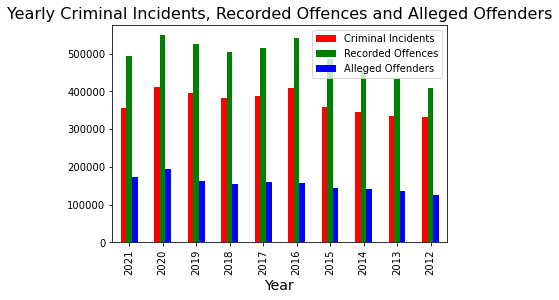

<Figure size 1080x576 with 0 Axes>

In [51]:
# Generate a bar plot showing the distribution of Criminal Incidents, Recorded Offences and Alleged Offenders
only_ci_re_ao_df = reindex_ci_re_ao_df[['Criminal Incidents','Recorded Offences','Alleged Offenders']]
only_ci_re_ao_df.plot(kind="bar", color=['red', 'green', 'blue','black'])

# Add title and label
plt.title("Yearly Criminal Incidents, Recorded Offences and Alleged Offenders",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.figure(figsize=(15,8))
plt.show()

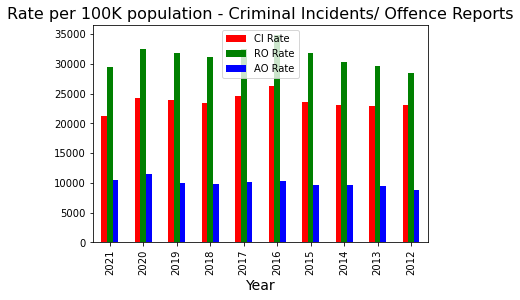

<Figure size 1080x576 with 0 Axes>

In [52]:
# Generate a bar plot showing the distribution Rate per 100K Population for Criminal Incidents, Recorded Offences and Alleged Offenders
rate_ci_re_ao_df = reindex_ci_re_ao_df[['CI Rate','RO Rate','AO Rate']]
rate_ci_re_ao_df.plot(kind="bar", color=['red', 'green', 'blue','black'])

# Add title and label
plt.title("Rate per 100K population - Criminal Incidents/ Offence Reports",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.figure(figsize=(15,8))
plt.show()

In [53]:
# Sort data by year ascending order
reindex_ci_re_ao_df = reindex_ci_re_ao_df.sort_values("Year")
reindex_ci_re_ao_df.round(decimals=2) 

,Criminal Incidents,CI Rate,Recorded Offences,RO Rate,Alleged Offenders,AO Rate,Total,Population
Year,,,,,,,,
2012,330923,23054.34,408983,28472.58,124409,8828.47,864315,1435404.66
2013,334927,22930.01,431391,29544.41,135671,9393.22,901989,1460649.37
2014,344922,23052.10,453935,30364.46,141126,9600.41,939983,1496271.42
2015,358499,23525.30,484868,31868.06,145121,9677.23,988488,1523887.35
2016,409373,26304.42,541368,34796.25,157383,10279.90,1108124,1556289.52
2017,388389,24513.68,513972,32464.40,158706,10185.49,1061067,1584376.78
2018,381193,23381.39,504689,31094.41,155388,9715.27,1041270,1630326.74
2019,394767,23847.41,525241,31803.16,162167,9939.46,1082175,1655387.13
2020,410764,24287.39,548465,32536.65,192965,11485.34,1152194,1691264.56


In [ ]:
# Plotting the KDE Plot using seaborn
# Perform kde plot for Criminal Incidents, Recorded Offences and Alleged Offenders on the same axis
sns.kdeplot(only_ci_re_ao_df['Criminal Incidents'], color='r', fill=True, label="Criminal Incidents")
sns.kdeplot(only_ci_re_ao_df['Recorded Offences'], color='g', fill=True, label="Recorded Offences")
sns.kdeplot(only_ci_re_ao_df['Alleged Offenders'], color='b', fill=True, label="Alleged Offenders")

plt.xlabel('Number of Incidents & Offences')
plt.ylabel('Probability Density')
plt.title("Kernel Density Estimate plot using Gaussian kernels",fontsize=16)
plt.legend()

Text(0.5, 1.0, 'Kernel Density Estimate plot using Gaussian kernels')

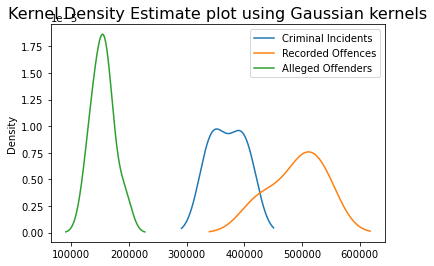

In [55]:
# Plotting the KDE Plot using pandas
# Perform kde plot for Criminal Incidents, Recorded Offences and Alleged Offenders on the same axis
ax = only_ci_re_ao_df.plot.kde()
plt.title("Kernel Density Estimate plot using Gaussian kernels",fontsize=16)

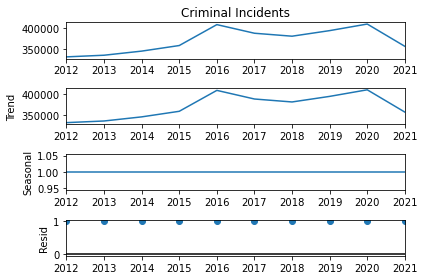

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Get Criminal Incidents data and plot seasonal_decompose graph with Observed, Trend, Seasonal and Residuel graphs
ci_series = reindex_ci_re_ao_df["Criminal Incidents"].squeeze()
result = seasonal_decompose(ci_series, model='multiplicative', period=1).plot()

plt.show()

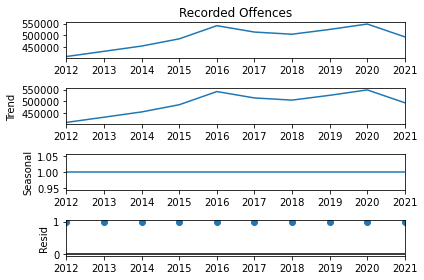

In [57]:
# Get Recorded Offences data and plot seasonal_decompose graph with Observed, Trend, Seasonal and Residuel graphs

ro_series = reindex_ci_re_ao_df["Recorded Offences"].squeeze()
result = seasonal_decompose(ro_series, model='multiplicative', period=1).plot()

plt.show()

In [ ]:
# Get Alleged Offenders data and plot seasonal_decompose graph with Observed, Trend, Seasonal and Residuel graphs
ao_series = reindex_ci_re_ao_df["Alleged Offenders"].squeeze()
result = seasonal_decompose(ao_series, model='multiplicative', period=1).plot()

plt.show()

In [61]:
# Read family incidents file
xls_lga_fi = pd.ExcelFile(path+'LGA_Family_Incidents_Year_Ending_September_2021.xlsx')

lga_fi_tab1 = pd.read_excel(xls_lga_fi, "Table 01")
lga_fi_tab2 = pd.read_excel(xls_lga_fi, "Table 02")

In [ ]:
# Total family incidents count
lga_fi_group2 = lga_fi_tab2.groupby(['Year']).sum()
lga_fi_group2 = lga_fi_group2.reset_index()
lga_fi_group2

In [ ]:
# Get family incidents data and plot seasonal_decompose graph with Observed, Trend, Seasonal and Residuel graphs
fi_series = lga_fi_group2["AFM Counter"].squeeze()
result = seasonal_decompose(fi_series, model='multiplicative', period=1).plot()

plt.show()